In [14]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [38]:
import warnings
warnings.filterwarnings('ignore')

In [39]:
data = pd.read_csv('Titanic_ML.csv',usecols=['Age','Fare','Survived'])

In [40]:
data.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


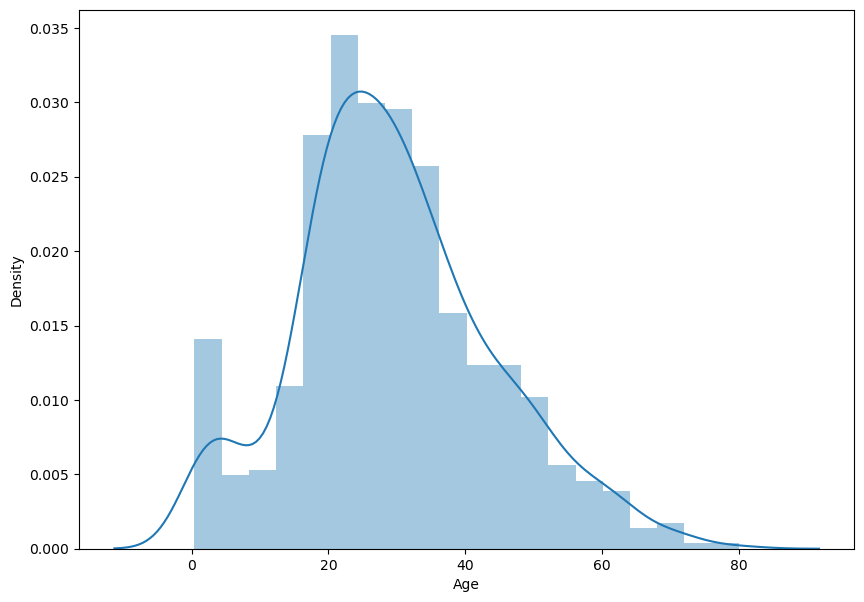

In [41]:
plt.figure(figsize=(10,7))
sns.distplot(data['Age'])
plt.show()

* here age has approximat normal distribution but then also we can see some of the outliers above 80. let's check

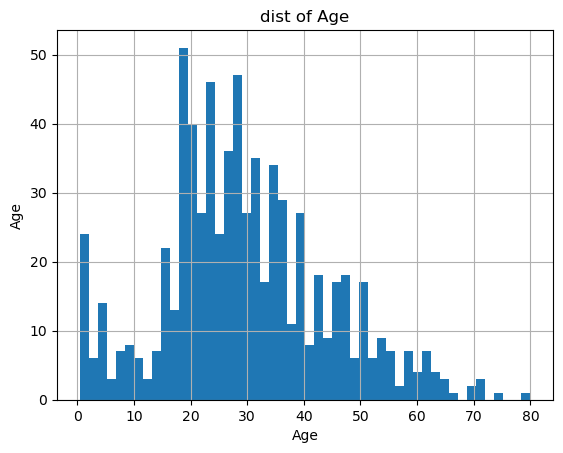

In [42]:
# with the help of histogram
figure = data['Age'].hist(bins=50)
figure.set_title('dist of Age')
figure.set_xlabel('Age')
figure.set_ylabel('Age')
plt.show()

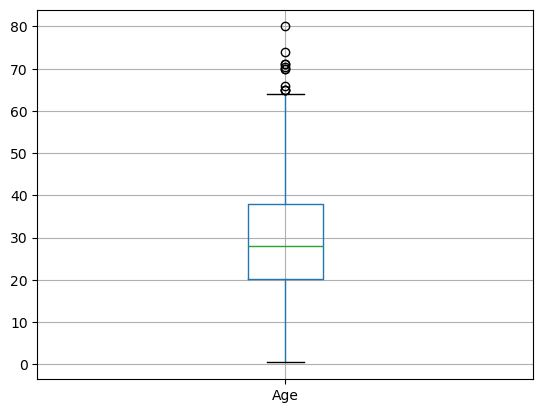

In [43]:
# with the help of boxplot
figure = data.boxplot(column='Age')
plt.show()

In [44]:
data[data['Age']>70]

,Survived,Age,Fare
96,0,71.0,34.6542
116,0,70.5,7.7500
493,0,71.0,49.5042
630,1,80.0,30.0000
851,0,74.0,7.7750


In [45]:
df = data.copy()

IQR = df['Age'].quantile(0.75) - df['Age'].quantile(0.25)

lower = df['Age'].quantile(0.25) - 1.5* IQR
upper = df['Age'].quantile(0.75) + 1.5* IQR

df = df[((df['Age']>lower) & (df['Age']<upper))]

In [46]:
df[df['Age']>70]

,Survived,Age,Fare


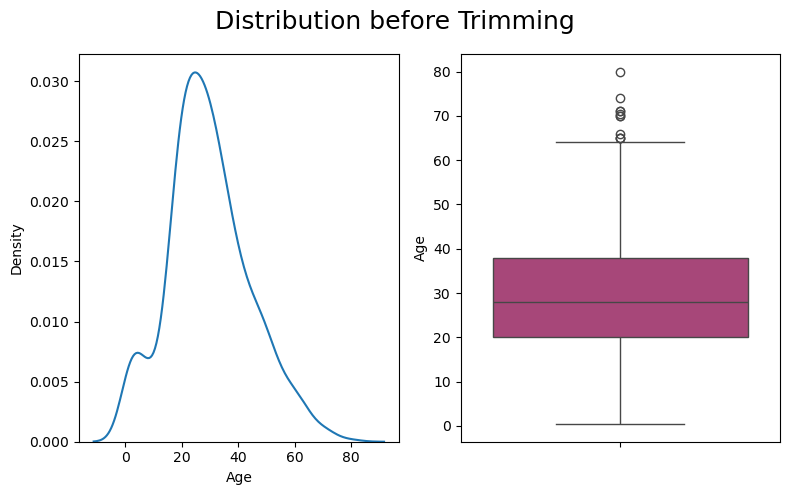

In [47]:
plt.figure(figsize=(8,5))
plt.suptitle("Distribution before Trimming", fontsize=18)
plt.subplot(1,2,1)
sns.kdeplot(data = data['Age'])
plt.subplot(1,2,2)
sns.boxplot(data = data['Age'], palette="magma")
plt.tight_layout()
plt.show()


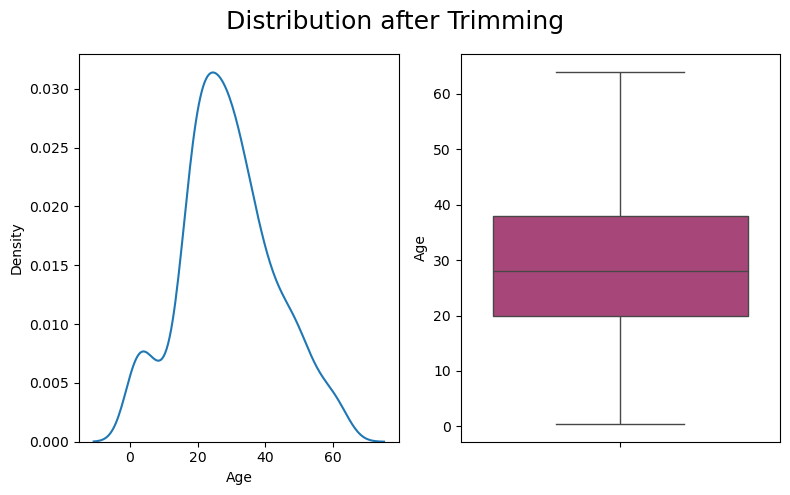

In [48]:
plt.figure(figsize=(8,5))
plt.suptitle("Distribution after Trimming",fontsize=18)
plt.subplot(1,2,1)
sns.kdeplot(df['Age'])
plt.subplot(1,2,2)
sns.boxplot(df['Age'], palette="magma")
plt.tight_layout()
plt.show()

## *B) CENSORING*

In [54]:
IQR = data['Fare'].quantile(0.75) - data['Fare'].quantile(0.25)
IQR

23.0896

In [55]:
lower = data['Fare'].quantile(0.25) - IQR * 1.5
upper = data['Fare'].quantile(0.75) + IQR * 1.5

In [56]:
df = data.copy()
df['Fare'] = np.where(df['Fare']>upper,upper, np.where(df['Fare']<lower,lower,data['Fare']))


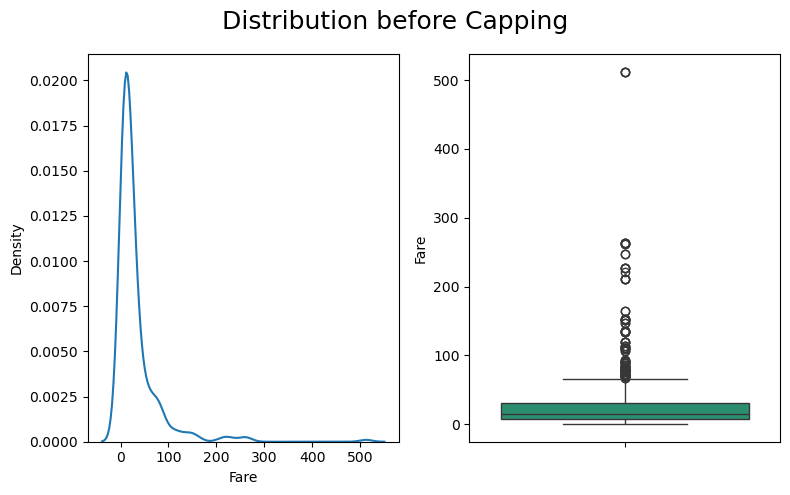

In [57]:
plt.figure(figsize=(8,5))
plt.suptitle("Distribution before Capping", fontsize=18)
plt.subplot(1,2,1)
sns.kdeplot(data['Fare'], palette="cool")
plt.subplot(1,2,2)
sns.boxplot(data['Fare'], palette="Dark2")
plt.tight_layout()
plt.show()

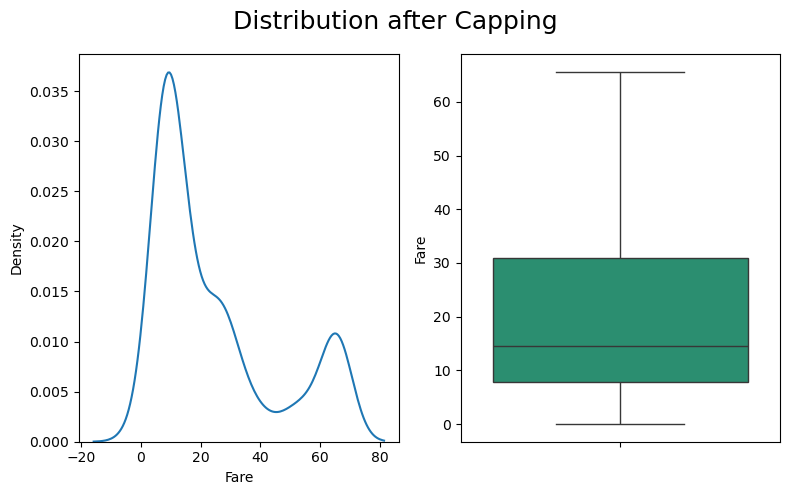

In [58]:
plt.figure(figsize=(8,5))
plt.suptitle("Distribution after Capping",fontsize=18)
plt.subplot(1,2,1)
sns.kdeplot(df['Fare'], palette="cool")
plt.subplot(1,2,2)
sns.boxplot(df['Fare'], palette="Dark2")
plt.tight_layout()
plt.show()

In [59]:
# for Extreme Outliers use this boundaries.
lower_bridge = data['Age'].quantile(0.25) -  3 * IQR
upper_bridge = data['Age'].quantile(0.75) +  3 * IQR
print(lower_bridge)
print(upper_bridge)

-49.1438
107.2688


### 3) Arbitrarily

In [60]:
lower = 1
upper = 71
df = data.copy()
df['Age'] = np.where(df['Age']>upper,upper, np.where(df['Age']<lower,lower,data['Age'])) 

### 4) Using Quantiles

In [61]:
df = data.copy()
lower = df['Age'].quantile(0.10)
upper = df['Age'].quantile(0.90)
print(lower)
print(upper)

14.0
50.0
